[[4 0 0 0]
 [0 7 0 0]
 [0 0 3 0]
 [0 0 0 6]]


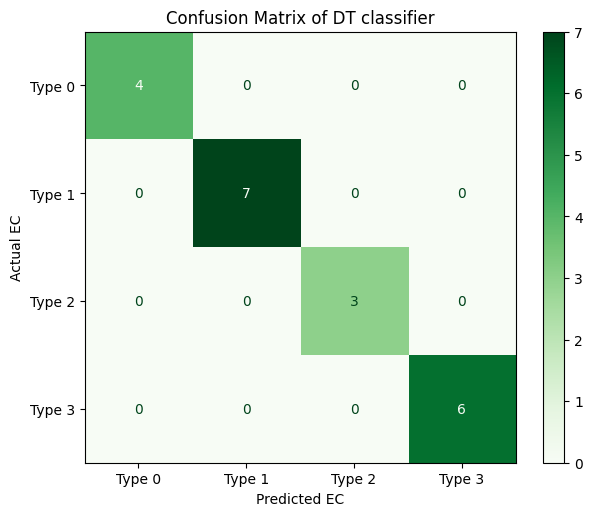

K cross validation :
Accuracy: 81.67 %
Standard Deviation: 2.36 %
F1 Score: 1.00
Recall: 1.00
Precision: 1.00


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.base import is_regressor

dataset = pd.read_csv(r'C:\Users\ASUS\Dropbox\EIS\Code\Simulated EIS data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test, y_pred)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(7, 5.6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Type 0", "Type 1", "Type 2", "Type 3"])
disp.plot(cmap="Greens", ax=ax, values_format=".0f")
plt.xlabel("Predicted EC")
plt.ylabel("Actual EC")
plt.title("Confusion Matrix of DT classifier")
plt.show()


from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("K cross validation :")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Decision Tree regressor with the best hyperparameters
best_dt_regressor = DecisionTreeClassifier(**best_params)
best_dt_regressor.fit(X_train, y_train)


In [4]:
import pandas as pd
import numpy as np

input_csv = r'C:\Users\ASUS\Dropbox\EIS\Code\Raw Data for Fitting.csv'
output_csv = ''

df = pd.read_csv(input_csv)
new_data_points = 60
interpolated_df = pd.DataFrame()

for column in df.columns:
    # Convert the column to numeric, handling non-numeric values
    df[column] = pd.to_numeric(df[column], errors='coerce')

    x = np.linspace(0, len(df[column]) - 1, len(df[column]))
    x_new = np.linspace(0, len(df[column]) - 1, new_data_points)
    y = df[column].values
    
    # Handle NaN values resulting from non-numeric entries
    y_interp = np.interp(x_new, x, y, left=np.nan, right=np.nan)
    interpolated_df[column] = y_interp

interpolated_df.to_csv(output_csv, index=False)

new_input = pd.read_csv(output_csv)
class_probs = classifier.predict_proba(new_input)
print(class_probs)

new_input = pd.read_csv(output_csv)
prediction = classifier.predict(new_input)
print(prediction)


ValueError: could not convert string to float: 'C:\\Users\\ASUS\\Dropbox\\EIS\\Code\\Raw Data for Fitting.csv'

In [3]:

from impedance import preprocessing
from impedance.visualization import plot_nyquist
from impedance.models.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist
from impedance.models.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
import numpy as np
  


if prediction == 0 :


  frequencies, Z = preprocessing.readCSV('')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[9.0e+04, 4.52e-08 , 4.0e-01, 1.49e+06, 3.0e-07, 4.0e-01, 5.0e+07, 5.0e+09, 8.0e+04],
                              circuit='R_0 - p(CPE_1, R_1 - p(CPE_2, R_2 - Wo_1))')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print(customCircuit)
elif prediction == 1 :
  frequencies, Z = preprocessing.readCSV('')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[7.0e+04, 7.0e+04, 1.0e-06, 2.50e-01, 1.0e+05  , 2.0e-09,  8.0e-01],
                              circuit='R_0-p(R_1,CPE_1)-p(R_2,CPE_2)')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print(customCircuit)
elif prediction == 2 :
  frequencies, Z = preprocessing.readCSV('')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[1.0e+05, 2.0e+05, 5.0e-09, 7.0e-01 ],
                              circuit='R_0-p(R_1,CPE_1)')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print(customCircuit)
else :
  frequencies, Z = preprocessing.readCSV('')
  frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
  customCircuit = CustomCircuit(initial_guess=[7.0e+04, 7.0e+04, 1.02e-06, 2.50e-01, 1.0e+05  , 2.0e-09,  8.0e-01],
                              circuit='R_1 - p(CPE_2,R_2) - P((CPE_3,R_3 - P(L_4, R_4))')
  customCircuit.fit(frequencies, Z)
  customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
  plt.show()
  print(customCircuit)

NameError: name 'prediction' is not defined